## Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
data = pd.read_csv("regression_data_clean.csv")

## First look at its main features (head, shape, info).

In [3]:
display(data.head())
display(data.shape)
display(data.info())
display(list(data.columns))

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


(21597, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

None

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

## Change date column to datetime format.

In [4]:
data['date'] =  pd.to_datetime(data['date'])
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

## Check NaN values per column.

In [5]:
nans = data[data.isna().any(axis=1)]
display(nans.head())
print('----------------------------------')
display(data.isna().any(axis=1))
print('----------------------------------')
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
display(nulls.sort_values(by='Percentage Null Values', ascending = False))

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


----------------------------------


0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

----------------------------------


,column_name,Percentage Null Values
0,id,0.0
11,sqft_above,0.0
19,sqft_lot15,0.0
18,sqft_living15,0.0
17,long,0.0
16,lat,0.0
15,zipcode,0.0
14,yr_renovated,0.0
13,yr_built,0.0
12,sqft_basement,0.0


### Settig id as index and dropping the date variable, as it most definitely won't be useful in the model.

In [6]:
data = data.set_index(data['id'])
data = data.drop(['id', 'date'], axis=1)
display(data.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## Building models with raw data

In [7]:
y = data['price']
X_raw_test = data.drop(['price'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_raw_test, y, test_size=0.3, random_state=100)

In [8]:
def lin_model_maker(X_train, y_train, X_test):
    lm = linear_model.LinearRegression()
    lm_model = lm.fit(X_train,y_train)
    lm_predictions = lm_model.predict(X_test)
    return lm_predictions

def knn_model_maker(X_train, y_train, X_test, K):
    knn_model = KNeighborsRegressor(n_neighbors=K) # The keyword "n_neighbors" is what sets the K.
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    return knn_predictions

def knn_model_creator(K):
    return lambda X_train, y_train, X_test : knn_model_maker(X_train, y_train, X_test, K)

In [9]:
linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")

results for linear model

The mean absolute error of the model in the test set is: 126722.10

The mean squared error of the model in the test set is: 45971078984.74

The root mean squared error of the model in the test set is: 214408.67

The R2 of the model in the test set is: 0.69
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 172711.88

The mean squared error of the model in the test set is: 86275878678.02

The root mean squared error of the model in the test set is: 293727.56

The R2 of the model in the test set is: 0.41
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 165409.53

The mean squared error of the model in the test set is: 78656936376.08

The root mean squared error of the model in the test set is: 280458.44

The R2 of the model in the test set is: 0.46
---------------------------------------------

#### Conclusion: Linear model is performimg better on raw data than KNN model.

### Min-max scaler on all raw data

In [10]:
y = data['price']
X_raw_test = data.drop(['price'], axis = 1, inplace = False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = scaler.fit(X_raw_test)
transformed = scaler.transform(X_raw_test)
raw_transformed = pd.DataFrame(transformed, index = X_raw_test.index, columns = X_raw_test.columns )
display(raw_transformed.head())
display(raw_transformed.shape)

X_train, X_test, y_train, y_test = train_test_split(raw_transformed, y, test_size=0.3, random_state=100)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,0.06250,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
6414100192,0.06250,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
5631500400,0.03125,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
2487200875,0.09375,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
1954400510,0.06250,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


(21597, 18)

In [11]:
linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")

results for linear model

The mean absolute error of the model in the test set is: 126849.92

The mean squared error of the model in the test set is: 45968474427.53

The root mean squared error of the model in the test set is: 214402.60

The R2 of the model in the test set is: 0.69
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 91097.80

The mean squared error of the model in the test set is: 39609320145.63

The root mean squared error of the model in the test set is: 199020.90

The R2 of the model in the test set is: 0.73
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 87969.05

The mean squared error of the model in the test set is: 37528150926.31

The root mean squared error of the model in the test set is: 193721.84

The R2 of the model in the test set is: 0.74
-----------------------------------------------

## Checking correlations

#### All the elements are numerical, so we can make a big heatmap for every value.

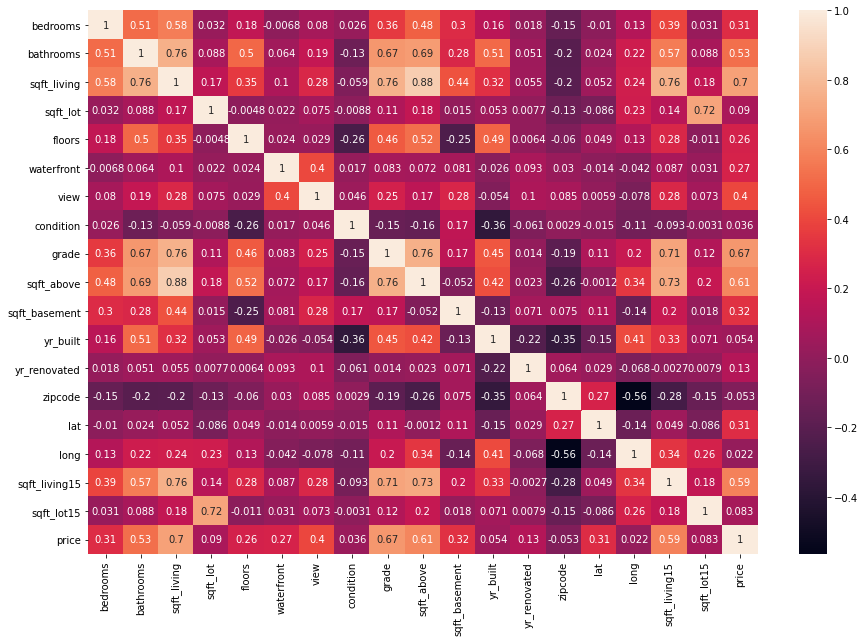

In [12]:
corr_matrix = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Dropping irrelevant columns and building the model (to check if it can improve), still raw data

In [13]:
y = data['price']
X_raw_sqft_living_corr = data[['sqft_living', 'bedrooms','waterfront', 'sqft_lot', 'floors', 'view', 'sqft_basement','lat', 'yr_built', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X_raw_sqft_living_corr, y, test_size=0.3, random_state=100)

In [14]:
linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")

results for linear model

The mean absolute error of the model in the test set is: 137760.71

The mean squared error of the model in the test set is: 51568127712.74

The root mean squared error of the model in the test set is: 227086.17

The R2 of the model in the test set is: 0.65
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 182775.31

The mean squared error of the model in the test set is: 88710678094.21

The root mean squared error of the model in the test set is: 297843.38

The R2 of the model in the test set is: 0.39
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 173797.16

The mean squared error of the model in the test set is: 80858042446.66

The root mean squared error of the model in the test set is: 284355.49

The R2 of the model in the test set is: 0.45
---------------------------------------------

In [15]:
y = data['price']
X_raw_grade_corr = data[['grade', 'bedrooms','bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'sqft_basement','long', 'yr_built', 'sqft_lot15']]
X_train, X_test, y_train, y_test = train_test_split(X_raw_grade_corr, y, test_size=0.3, random_state=100)

In [16]:
linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")

results for linear model

The mean absolute error of the model in the test set is: 146808.71

The mean squared error of the model in the test set is: 59006832523.43

The root mean squared error of the model in the test set is: 242913.22

The R2 of the model in the test set is: 0.60
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 245876.54

The mean squared error of the model in the test set is: 168367469280.96

The root mean squared error of the model in the test set is: 410326.05

The R2 of the model in the test set is: -0.15
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 233804.10

The mean squared error of the model in the test set is: 151318602431.94

The root mean squared error of the model in the test set is: 388996.92

The R2 of the model in the test set is: -0.03
-----------------------------------------

In [17]:
y = data['price']
X_raw_drop_sqft = data.drop(['price','sqft_lot', 'sqft_lot15', 'sqft_basement'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_raw_drop_sqft, y, test_size=0.3, random_state=100)

linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")

results for linear model

The mean absolute error of the model in the test set is: 126855.62

The mean squared error of the model in the test set is: 46065561806.95

The root mean squared error of the model in the test set is: 214628.89

The R2 of the model in the test set is: 0.69
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 171476.07

The mean squared error of the model in the test set is: 79972553562.80

The root mean squared error of the model in the test set is: 282794.19

The R2 of the model in the test set is: 0.45
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 163388.13

The mean squared error of the model in the test set is: 70713903391.98

The root mean squared error of the model in the test set is: 265920.86

The R2 of the model in the test set is: 0.52
---------------------------------------------

### Conclusion - no deletions of columns seem to significantly help the model. But deletion of some columns is not lowering the performance, so let's proceed with normalizing columns.

In [18]:
X_to_trans_drop = data.drop(['price', 'sqft_lot', 'sqft_lot15', 'sqft_basement'], axis = 1, inplace = False)
X_to_trans_drop

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
id,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340
6414100192,3,2.25,2570,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690
5631500400,2,1.00,770,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720
2487200875,4,3.00,1960,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360
1954400510,3,2.00,1680,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,3.0,0,0,3,8,1530,2009,0,98103,47.6993,-122.346,1530
6600060120,4,2.50,2310,2.0,0,0,3,8,2310,2014,0,98146,47.5107,-122.362,1830
1523300141,2,0.75,1020,2.0,0,0,3,7,1020,2009,0,98144,47.5944,-122.299,1020


## Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [19]:
numcols = X_to_trans_drop.select_dtypes(np.number)
numcols_list = list(numcols.columns)
discrete_cols = []
continuous_cols = []
for col in numcols_list:
    item_counts = data[col].value_counts()
    print(col, ' : ', len(item_counts))
    if len(item_counts) > 120:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)
print(discrete_cols)
print(continuous_cols)

bedrooms  :  12
bathrooms  :  29
sqft_living  :  1034
floors  :  6
waterfront  :  2
view  :  5
condition  :  5
grade  :  11
sqft_above  :  942
yr_built  :  116
yr_renovated  :  70
zipcode  :  70
lat  :  5033
long  :  751
sqft_living15  :  777
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
['sqft_living', 'sqft_above', 'lat', 'long', 'sqft_living15']


In [20]:
continuous = data[continuous_cols]
display(continuous.head())
discrete = data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']]
display(discrete.head())
categorical = data['zipcode']
display(continuous.shape)
display(discrete.shape)

,sqft_living,sqft_above,lat,long,sqft_living15
id,,,,,
7129300520,1180,1180,47.5112,-122.257,1340
6414100192,2570,2170,47.7210,-122.319,1690
5631500400,770,770,47.7379,-122.233,2720
2487200875,1960,1050,47.5208,-122.393,1360
1954400510,1680,1680,47.6168,-122.045,1800


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,,,,,,,,,
7129300520,3,1.00,1.0,0,0,3,7,1955,0
6414100192,3,2.25,2.0,0,0,3,7,1951,1991
5631500400,2,1.00,1.0,0,0,3,6,1933,0
2487200875,4,3.00,1.0,0,0,5,7,1965,0
1954400510,3,2.00,1.0,0,0,3,8,1987,0


(21597, 5)

(21597, 9)

In [21]:
continuous['long'] = continuous['long'].abs()
continuous

<ipython-input-21-838ed76eeac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous['long'] = continuous['long'].abs()


,sqft_living,sqft_above,lat,long,sqft_living15
id,,,,,
7129300520,1180,1180,47.5112,122.257,1340
6414100192,2570,2170,47.7210,122.319,1690
5631500400,770,770,47.7379,122.233,2720
2487200875,1960,1050,47.5208,122.393,1360
1954400510,1680,1680,47.6168,122.045,1800
...,...,...,...,...,...
263000018,1530,1530,47.6993,122.346,1530
6600060120,2310,2310,47.5107,122.362,1830
1523300141,1020,1020,47.5944,122.299,1020


### Create a function to plot every discrete variables. 

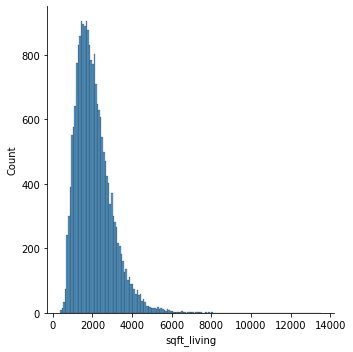

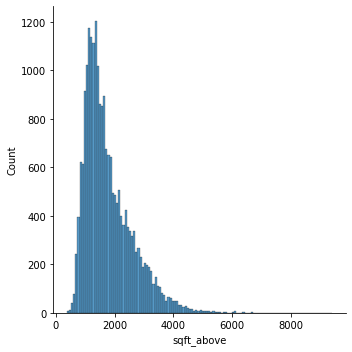

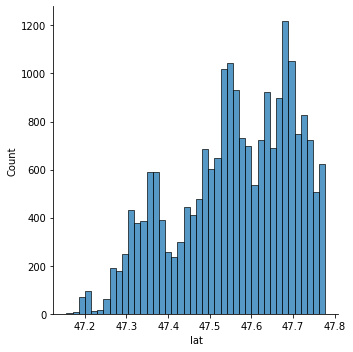

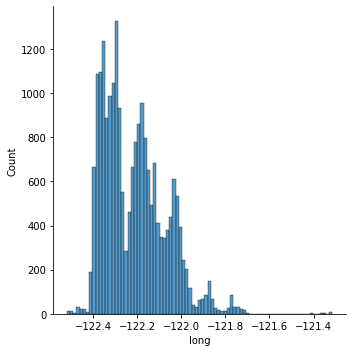

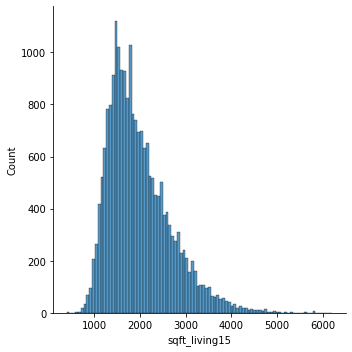

In [22]:
def num_plotter(df):
    numcolumns = df.select_dtypes(np.number)
    numcolumns_list = list(numcolumns.columns)
    for col in numcolumns_list:
        sns.displot(numcols, x = col)
        plt.show()

num_plotter(continuous)

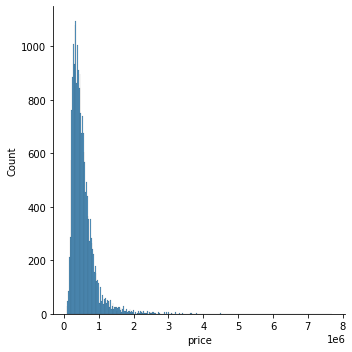

In [23]:
sns.displot(data, x = 'price')
plt.show()

### Look for outliers in the continuous variables we have found.

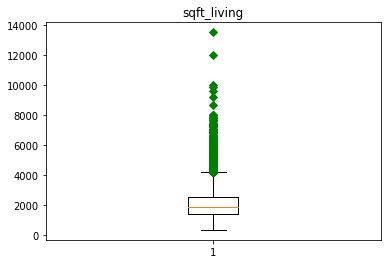

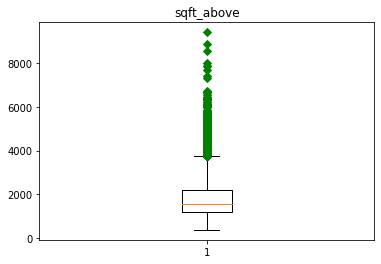

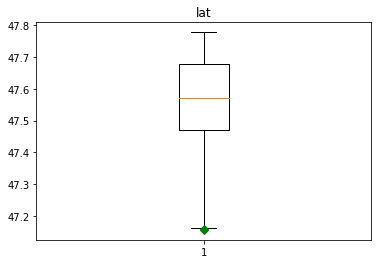

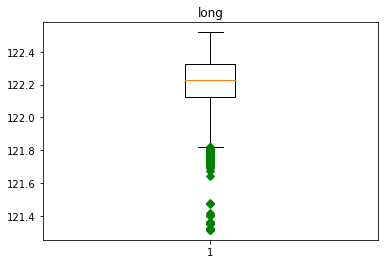

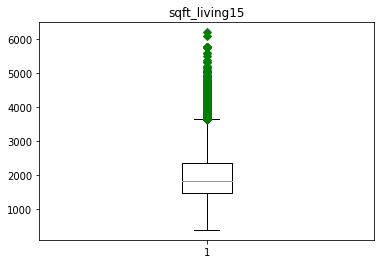

In [24]:
def get_boxplot(df):
    df_cols_list = list(df.columns)
    for col in df_cols_list:
        fig1, ax1 = plt.subplots()
        ax1.set_title(col)
        ax1.boxplot(df[col], 0, 'gD')
        plt.show()

get_boxplot(continuous)

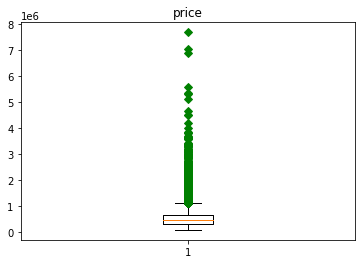

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('price')
ax1.boxplot(data['price'], 0, 'gD')
plt.show()

### Have you found outliers? If you have, what should we do with them?

Yes, there are plenty of outliers, but my guess is that those values are not really outliers, but just a sign of a very non-normal distribution of values in the columns. Therefore, the bet thing to do is just to perform data transformations(most preferably `box-cox`) in order to make the distribution closer to normal, because if we deal with outliers in other way, it will affect the data, because the amount of "outliers" is big.

### 1) Open the categoricals variable we created before.

In [26]:
categorical.head()


id
7129300520    98178
6414100192    98125
5631500400    98028
2487200875    98136
1954400510    98074
Name: zipcode, dtype: int64

### Box-Cox transformation to reduce the amount of outliers


/home/annast/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:906: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/home/annast/.local/lib/python3.8/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/annast/.local/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/annast/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/annast/.local/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


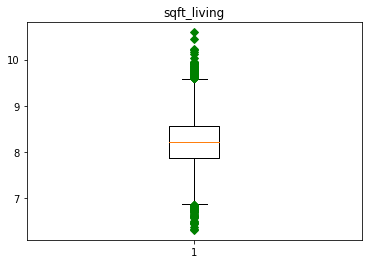

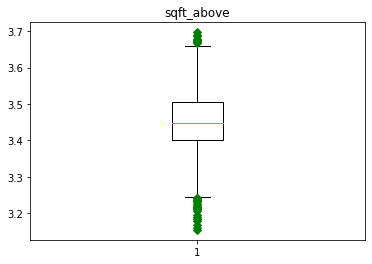

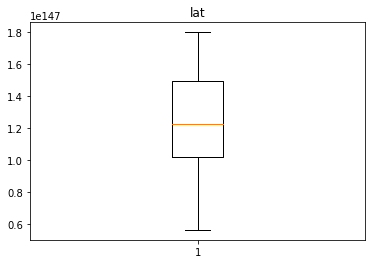

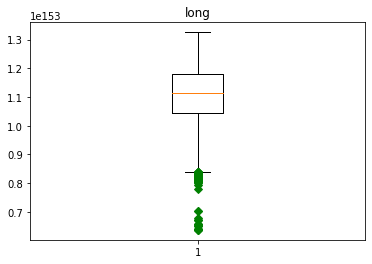

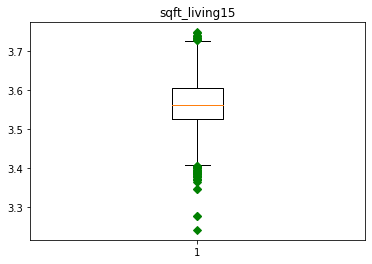

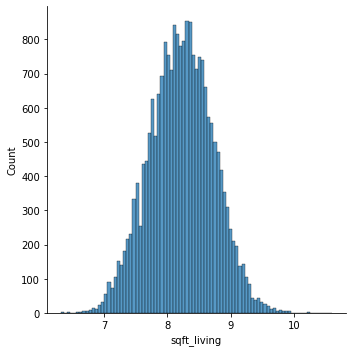

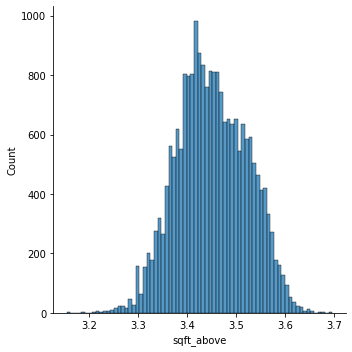

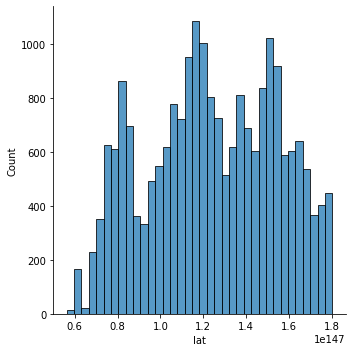

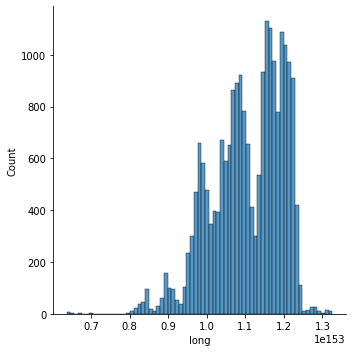

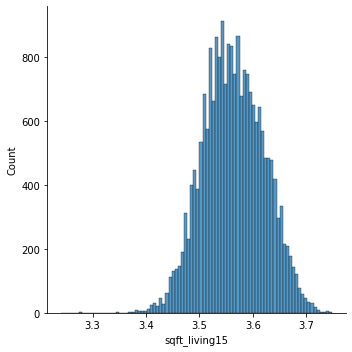

In [27]:
list_cols_cont = list(continuous.columns)
transformed_cont = continuous.copy()
for col in list_cols_cont:
    fitted_data, lmbda = stats.boxcox(transformed_cont[col])
    transformed_cont[col] = pd.DataFrame(fitted_data, index = continuous.index)

get_boxplot(transformed_cont)
numcolumns_list = list(transformed_cont.columns)
for col in numcolumns_list:
    sns.displot(transformed_cont, x = col)
    plt.show()


In [28]:
transformed_cont

,sqft_living,sqft_above,lat,long,sqft_living15
id,,,,,
7129300520,7.658180,3.398681,1.096091e+147,1.130966e+153,3.504526
6414100192,8.576665,3.502039,1.621326e+147,1.174336e+153,3.547209
5631500400,7.161163,3.316683,1.673145e+147,1.114605e+153,3.627887
2487200875,8.255136,3.377090,1.115945e+147,1.228253e+153,3.507320
1954400510,8.073078,3.460455,1.335117e+147,9.942701e+152,3.558416
...,...,...,...,...,...
263000018,7.962922,3.444609,1.557109e+147,1.193733e+153,3.529195
6600060120,8.449871,3.511814,1.095067e+147,1.205375e+153,3.561327
1523300141,7.487998,3.371633,1.280449e+147,1.160170e+153,3.451315


#### As we see, the transformation worked good on the columns.

### 4) Encode the categorical variables

In [29]:
nominals = pd.get_dummies(categorical)
nominals

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6414100192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2487200875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954400510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6600060120,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1523300141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### We need to scale the discrete and transformed comtinuous to have them in range [o,1]

In [30]:
nums_to_transform = pd.concat([transformed_cont, discrete], axis = 1)
nums_to_transform

,sqft_living,sqft_above,lat,long,sqft_living15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,,,,,,,,,,,,,,
7129300520,7.658180,3.398681,1.096091e+147,1.130966e+153,3.504526,3,1.00,1.0,0,0,3,7,1955,0
6414100192,8.576665,3.502039,1.621326e+147,1.174336e+153,3.547209,3,2.25,2.0,0,0,3,7,1951,1991
5631500400,7.161163,3.316683,1.673145e+147,1.114605e+153,3.627887,2,1.00,1.0,0,0,3,6,1933,0
2487200875,8.255136,3.377090,1.115945e+147,1.228253e+153,3.507320,4,3.00,1.0,0,0,5,7,1965,0
1954400510,8.073078,3.460455,1.335117e+147,9.942701e+152,3.558416,3,2.00,1.0,0,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,7.962922,3.444609,1.557109e+147,1.193733e+153,3.529195,3,2.50,3.0,0,0,3,8,2009,0
6600060120,8.449871,3.511814,1.095067e+147,1.205375e+153,3.561327,4,2.50,2.0,0,0,3,8,2014,0
1523300141,7.487998,3.371633,1.280449e+147,1.160170e+153,3.451315,2,0.75,2.0,0,0,3,7,2009,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(nums_to_transform.values)
nums_transformed = pd.DataFrame(scaled_features, index = nums_to_transform.index, columns = nums_to_transform.columns)
nums_transformed.head()



,sqft_living,sqft_above,lat,long,sqft_living15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,,,,,,,,,,,,,,
7129300520,-1.124420,-0.737381,-0.476117,0.277071,-1.043484,-0.402903,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.544678,-0.210210
6414100192,0.707178,0.705707,1.266485,0.752443,-0.294269,-0.402903,0.174486,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,-0.680850,4.744842
5631500400,-2.115547,-1.882247,1.438410,0.097742,1.121899,-1.482493,-1.451073,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.293626,-0.210210
2487200875,0.066001,-1.038843,-0.410245,1.343409,-0.994441,0.676687,1.149821,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,-0.204247,-0.210210
1954400510,-0.297051,0.125108,0.316914,-1.221218,-0.097539,-0.402903,-0.150626,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,0.544700,-0.210210


In [32]:
"""from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = scaler.fit(nums_to_transform)
transformed = scaler.transform(nums_to_transform)
nums_transformed = pd.DataFrame(transformed, index = nums_to_transform.index, columns = nums_to_transform.columns)
nums_transformed"""

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ntransformer = scaler.fit(nums_to_transform)\ntransformed = scaler.transform(nums_to_transform)\nnums_transformed = pd.DataFrame(transformed, index = nums_to_transform.index, columns = nums_to_transform.columns)\nnums_transformed'

### 6) Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [33]:
data_full = pd.concat([nums_transformed, nominals], axis = 1)


In [34]:
y = data['price']
X = data_full
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [35]:
linear = lin_model_maker

model_dict = {linear:"linear model"}

for i in range(2, 11):
    model_dict[knn_model_creator(i)] = str("knn, k = %d" % (i))

for m, name in model_dict.items():
    predictions = m(X_train, y_train, X_test)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    print("results for", name)
    print()
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print()
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print()
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print()
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    print("------------------------------------------------------")


results for linear model

The mean absolute error of the model in the test set is: 104361.98

The mean squared error of the model in the test set is: 38625744195.89

The root mean squared error of the model in the test set is: 196534.33

The R2 of the model in the test set is: 0.74
------------------------------------------------------
results for knn, k = 2

The mean absolute error of the model in the test set is: 90459.10

The mean squared error of the model in the test set is: 41116802861.22

The root mean squared error of the model in the test set is: 202772.79

The R2 of the model in the test set is: 0.72
------------------------------------------------------
results for knn, k = 3

The mean absolute error of the model in the test set is: 85816.57

The mean squared error of the model in the test set is: 36901121551.34

The root mean squared error of the model in the test set is: 192096.65

The R2 of the model in the test set is: 0.75
-----------------------------------------------

### 5) You can check also the MLPRegressor for this task!

In [36]:
"""from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_for_mlp = data_full
X_train, X_test, y_train, y_test = train_test_split(X_for_mlp, y, test_size=0.3, random_state=100)

def mlp_regressor_model(X_train, y_train, X_test):
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    return regr.predict(X_test)


predictions = mlp_regressor_model(X_train, y_train, X_test)
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("results for Multi-layer Perceptron(MLP) model")
print()
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print()
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print()
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print()
print("The R2 of the model in the test set is: %4.2f" % (R2)"""


'from sklearn.neural_network import MLPRegressor\nfrom sklearn.datasets import make_regression\nfrom sklearn.model_selection import train_test_split\n\nX_for_mlp = data_full\nX_train, X_test, y_train, y_test = train_test_split(X_for_mlp, y, test_size=0.3, random_state=100)\n\ndef mlp_regressor_model(X_train, y_train, X_test):\n    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)\n    return regr.predict(X_test)\n\n\npredictions = mlp_regressor_model(X_train, y_train, X_test)\nMAE = mean_absolute_error(y_test,predictions)\nMSE = mean_squared_error(y_test,predictions)\nRMSE = np.sqrt(MSE)\nR2 = r2_score(y_test,predictions)\n\nprint("results for Multi-layer Perceptron(MLP) model")\nprint()\nprint("The mean absolute error of the model in the test set is: %6.2f" % (MAE))\nprint()\nprint("The mean squared error of the model in the test set is: %6.2f" % (MSE))\nprint()\nprint("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))\nprint()\nprint(

In [37]:
X_for_xgb = data.drop(['price', 'sqft_lot', 'sqft_lot15', 'sqft_basement'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_for_xgb, y, test_size=0.3, random_state=100)

In [38]:
import xgboost as xgb
from xgboost import XGBRegressor

In [39]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("results for XGBRegression model")
print()
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print()
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print()
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print()
print("The R2 of the model in the test set is: %4.2f" % (R2))

results for XGBRegression model

The mean absolute error of the model in the test set is: 70269.83

The mean squared error of the model in the test set is: 18158759878.99

The root mean squared error of the model in the test set is: 134754.44

The R2 of the model in the test set is: 0.88


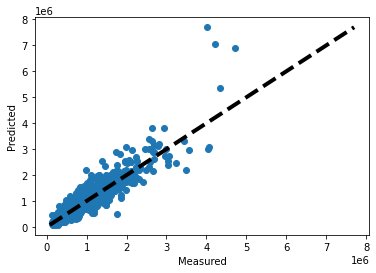

In [40]:
fig, ax = plt.subplots()
ax.scatter(predictions, y_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [41]:
X_for_xgb2 = data.drop(['price', 'sqft_lot', 'sqft_lot15', 'sqft_basement'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_for_xgb2, y, test_size=0.3, random_state=100)
model = xgb.XGBRegressor(nthread = 1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("results for XGBRegression model")
print()
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print()
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print()
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print()
print("The R2 of the model in the test set is: %4.2f" % (R2))

results for XGBRegression model

The mean absolute error of the model in the test set is: 70269.83

The mean squared error of the model in the test set is: 18158759878.99

The root mean squared error of the model in the test set is: 134754.44

The R2 of the model in the test set is: 0.88
